# Q1. Students and Examinations

Table: Students
```
+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| student_id    | int     |
| student_name  | varchar |
+---------------+---------+
student_id is the primary key (column with unique values) for this table.
Each row of this table contains the ID and the name of one student in the school.
 ```

Table: Subjects
```
+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| subject_name | varchar |
+--------------+---------+
subject_name is the primary key (column with unique values) for this table.
Each row of this table contains the name of one subject in the school.
 ```

Table: Examinations
```
+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| student_id   | int     |
| subject_name | varchar |
+--------------+---------+
There is no primary key (column with unique values) for this table. It may contain duplicates.
Each student from the Students table takes every course from the Subjects table.
Each row of this table indicates that a student with ID student_id attended the exam of subject_name.

```
Write a solution to find the number of times each student attended each exam.

Return the result table ordered by student_id and subject_name.

The result format is in the following example.

Example 1:

Input:
Students table:
```
+------------+--------------+
| student_id | student_name |
+------------+--------------+
| 1          | Alice        |
| 2          | Bob          |
| 13         | John         |
| 6          | Alex         |
+------------+--------------+
```
Subjects table:
```
+--------------+
| subject_name |
+--------------+
| Math         |
| Physics      |
| Programming  |
+--------------+
```
Examinations table:
```
+------------+--------------+
| student_id | subject_name |
+------------+--------------+
| 1          | Math         |
| 1          | Physics      |
| 1          | Programming  |
| 2          | Programming  |
| 1          | Physics      |
| 1          | Math         |
| 13         | Math         |
| 13         | Programming  |
| 13         | Physics      |
| 2          | Math         |
| 1          | Math         |
+------------+--------------+
```
Output:
```
+------------+--------------+--------------+----------------+
| student_id | student_name | subject_name | attended_exams |
+------------+--------------+--------------+----------------+
| 1          | Alice        | Math         | 3              |
| 1          | Alice        | Physics      | 2              |
| 1          | Alice        | Programming  | 1              |
| 2          | Bob          | Math         | 1              |
| 2          | Bob          | Physics      | 0              |
| 2          | Bob          | Programming  | 1              |
| 6          | Alex         | Math         | 0              |
| 6          | Alex         | Physics      | 0              |
| 6          | Alex         | Programming  | 0              |
| 13         | John         | Math         | 1              |
| 13         | John         | Physics      | 1              |
| 13         | John         | Programming  | 1              |
+------------+--------------+--------------+----------------+
```
Explanation:
The result table should contain all students and all subjects.
Alice attended the Math exam 3 times, the Physics exam 2 times, and the Programming exam 1 time.
Bob attended the Math exam 1 time, the Programming exam 1 time, and did not attend the Physics exam.
Alex did not attend any exams.
John attended the Math exam 1 time, the Physics exam 1 time, and the Programming exam 1 time.

In [ ]:
%%sql
drop table If Exists Students;
drop table If Exists Subjects;
drop table If Exists Examinations;
Create table If Not Exists Students (student_id int, student_name varchar(20));
Create table If Not Exists Subjects (subject_name varchar(20));
Create table If Not Exists Examinations (student_id int, subject_name varchar(20));
Truncate table Students;
insert into Students (student_id, student_name) values ('1', 'Alice');
insert into Students (student_id, student_name) values ('2', 'Bob');
insert into Students (student_id, student_name) values ('13', 'John');
insert into Students (student_id, student_name) values ('6', 'Alex');
Truncate table Subjects;
insert into Subjects (subject_name) values ('Math');
insert into Subjects (subject_name) values ('Physics');
insert into Subjects (subject_name) values ('Programming');
Truncate table Examinations;
insert into Examinations (student_id, subject_name) values ('1', 'Math');
insert into Examinations (student_id, subject_name) values ('1', 'Physics');
insert into Examinations (student_id, subject_name) values ('1', 'Programming');
insert into Examinations (student_id, subject_name) values ('2', 'Programming');
insert into Examinations (student_id, subject_name) values ('1', 'Physics');
insert into Examinations (student_id, subject_name) values ('1', 'Math');
insert into Examinations (student_id, subject_name) values ('13', 'Math');
insert into Examinations (student_id, subject_name) values ('13', 'Programming');
insert into Examinations (student_id, subject_name) values ('13', 'Physics');
insert into Examinations (student_id, subject_name) values ('2', 'Math');
insert into Examinations (student_id, subject_name) values ('1', 'Math');

In [15]:
%%sql
select
    s.student_id,
    student_name,
    su.subject_name,
    count(e.subject_name) as attended_exams
from Students s
cross join Subjects su
left join Examinations e
    on e.student_id = s.student_id
    and e.subject_name = su.subject_name
group by s.student_id, student_name, su.subject_name
order by s.student_id, su.subject_name

,student_id,student_name,subject_name,attended_exams
0,1,Alice,Math,3
1,1,Alice,Physics,2
2,1,Alice,Programming,1
3,2,Bob,Math,1
4,2,Bob,Physics,0
5,2,Bob,Programming,1
6,6,Alex,Math,0
7,6,Alex,Physics,0
8,6,Alex,Programming,0
9,13,John,Math,1


# Q2. Customers Who Bought All Products

Table: Customer
```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| customer_id | int     |
| product_key | int     |
+-------------+---------+
```
```
This table may contain duplicates rows.
customer_id is not NULL.
product_key is a foreign key (reference column) to Product table.
```


Table: Product
```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| product_key | int     |
+-------------+---------+
```
```
product_key is the primary key (column with unique values) for this table.
```


Write a solution to report the customer ids from the Customer table that bought all the products in the Product table.

Return the result table in any order.

The result format is in the following example.



Example 1:

Input:
Customer table:
```
+-------------+-------------+
| customer_id | product_key |
+-------------+-------------+
| 1           | 5           |
| 2           | 6           |
| 3           | 5           |
| 3           | 6           |
| 1           | 6           |
+-------------+-------------+
```
Product table:
```
+-------------+
| product_key |
+-------------+
| 5           |
| 6           |
+-------------+
```
Output:
```
+-------------+
| customer_id |
+-------------+
| 1           |
| 3           |
+-------------+
```
Explanation:
The customers who bought all the products (5 and 6) are customers with IDs 1 and 3.



In [2]:
%%sql
Create table If Not Exists Customer (customer_id int, product_key int);
Create table Product (product_key int);
Truncate table Customer;
insert into Customer (customer_id, product_key) values ('1', '5');
insert into Customer (customer_id, product_key) values ('2', '6');
insert into Customer (customer_id, product_key) values ('3', '5');
insert into Customer (customer_id, product_key) values ('3', '6');
insert into Customer (customer_id, product_key) values ('1', '6');
Truncate table Product;
insert into Product (product_key) values ('5');
insert into Product (product_key) values ('6');

Exception: Variable Name is not chosen

In [ ]:
%%sql


In [5]:
%%sql
select customer_id from Customer
group by customer_id
having count(distinct(product_key)) = (select count(*) from Product)
order by customer_id

Exception: Variable Name is not chosen

# Q3. Tree Node

Table: Tree
```
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| p_id        | int  |
+-------------+------+
```
```
id is the column with unique values for this table.
```
Each row of this table contains information about the id of a node and the id of its parent node in a tree.
The given structure is always a valid tree.


Each node in the tree can be one of three types:

* "Leaf": if the node is a leaf node.
* "Root": if the node is the root of the tree.
* "Inner": If the node is neither a leaf node nor a root node.
Write a solution to report the type of each node in the tree.

Return the result table in any order.

The result format is in the following example.
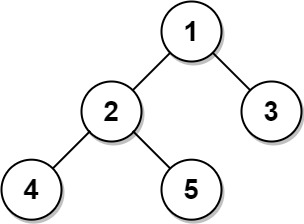

Input:
Tree table:
```
+----+------+
| id | p_id |
+----+------+
| 1  | null |
| 2  | 1    |
| 3  | 1    |
| 4  | 2    |
| 5  | 2    |
+----+------+
```
Output:
```
+----+-------+
| id | type  |
+----+-------+
| 1  | Root  |
| 2  | Inner |
| 3  | Leaf  |
| 4  | Leaf  |
| 5  | Leaf  |
+----+-------+
```
Explanation:
Node 1 is the root node because its parent node is null and it has child nodes 2 and 3.
Node 2 is an inner node because it has parent node 1 and child node 4 and 5.
Nodes 3, 4, and 5 are leaf nodes because they have parent nodes and they do not have child nodes.

In [ ]:
%%sql
Create table If Not Exists Tree (id int, p_id int);
Truncate table Tree;
insert into Tree (id, p_id) values ('1', NULL);
insert into Tree (id, p_id) values ('2', '1');
insert into Tree (id, p_id) values ('3', '1');
insert into Tree (id, p_id) values ('4', '2');
insert into Tree (id, p_id) values ('5', '2');

In [9]:
%%sql
select t2.id as id,
        case
            when count(distinct t2.p_id) = 0 then 'Root'
            when count(distinct t1.p_id) = 0 then 'Leaf'
            else 'Inner'
        end as type
from Tree t1 right join Tree t2
on t1.p_id = t2.id
group by t2.id


,id,type
0,1,Root
1,2,Inner
2,3,Leaf
3,4,Leaf
4,5,Leaf
